In [26]:
from libdatasets import *
import librun
import libstop
from importlib import reload
from libadversarial import uncertainty_stop
from libstop import rank_stop_conds
from functools import partial
from dotenv import load_dotenv; load_dotenv();

In [31]:
def plot_stop(plots, classifiers, stop_conditions, stop_results, scale='linear', figsize=(26, 4), lines=None):
    from librun import plot
    import matplotlib.pyplot as plt
    reload(libstop)
    from libstop import max_confidence, entropy_selected
    figaxes = plot(plots, ret=True, sort=False, extra=1, scale=scale, figsize=figsize)
    for i, (fig, ax) in enumerate(figaxes):
        clfs = classifiers[i]
        config = plots[i][0]
        metrics = plots[i][1]
        prop_cycle = plt.rcParams['axes.prop_cycle']
        colors = prop_cycle.by_key()['color']

        #entropy_values = list(entropy_selected(clfs[0]))
        ax[-1].plot(metrics[0].x, list(partial(entropy_selected, aggregator=np.mean)(clfs[0])), color='blue')
        ax[-1].plot(metrics[0].x, list(partial(entropy_selected, aggregator=np.min)(clfs[0])), color='green')
        ax[-1].plot(metrics[0].x, list(partial(entropy_selected, aggregator=np.max)(clfs[0])), color='red')
        ax[-1].plot(metrics[0].x, list(partial(entropy_selected, aggregator=np.median)(clfs[0])), color='yellow')
        ax[-1].axhline(1e-3, color='gray', ls='--')
        
        ax[-1].set_ylim(0, None)
        
        fig.legend()
        fig.tight_layout()

In [10]:
matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)
    "datasets": [
        ("rcv1", wrap(rcv1, None)),
        ("webkb", wrap(webkb, None)),
        ("spamassassin", wrap(spamassassin, None)),
    ],
    "dataset_mutators": {
        "none": (lambda *x, **kwargs: x),
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}

In [11]:
reload(librun)
results = librun.run(matrix, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

['C:\\Users\\Zac\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\research-KKf5lz0r-py3.8\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\Zac\\AppData\\Roaming\\jupyter\\runtime\\kernel-cf332be8-381d-4b4f-aa84-8e2f76f5f2d2.json']


Experiment:   0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
import libactive; reload(libactive); import libdatasets; from libactive import active_split; from sklearn.utils import check_random_state; 

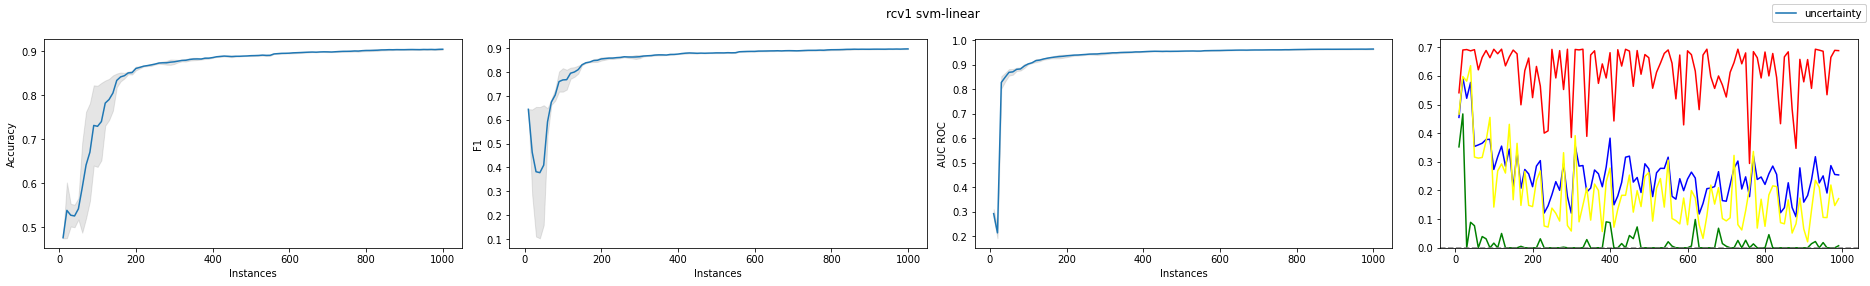

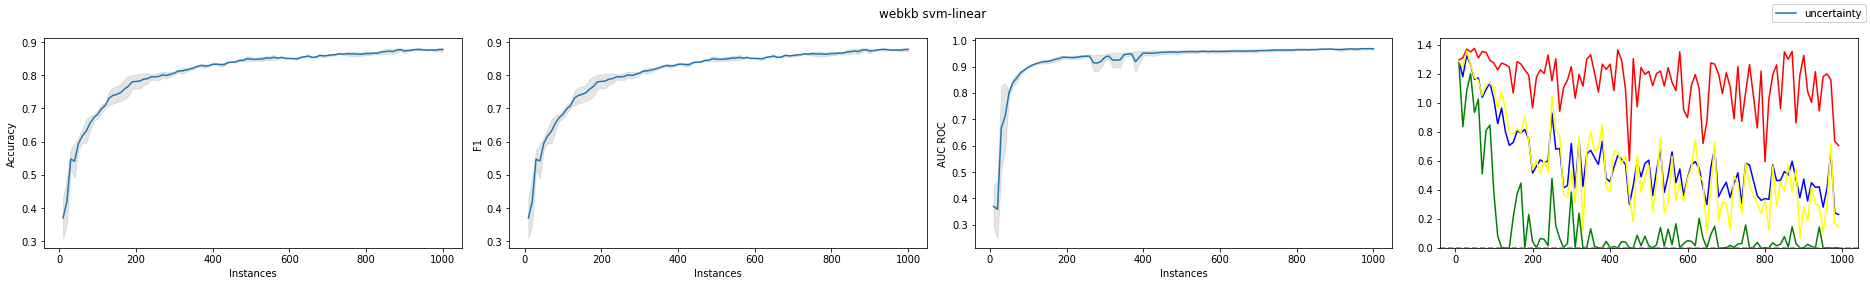

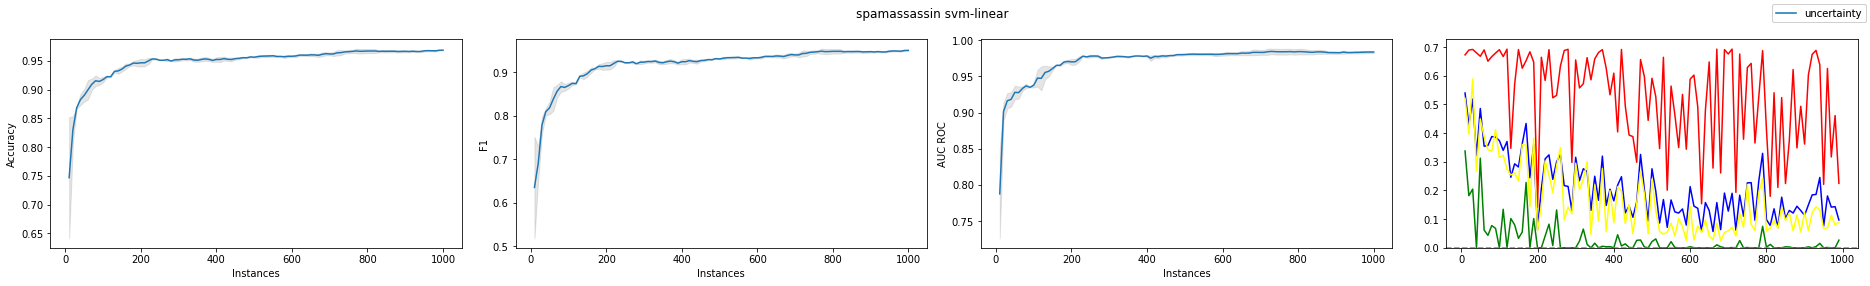

In [32]:
plot_stop(results_plots, classifiers, None, None)

## Analysis

Minimum aggregation makes the most sense as it should stop around the same time as the non-batch mode version. It's also the only one which is likely to stop given the paper's proposed threshold.